# Imports

In [1]:
from scipy.stats import gamma
import scipy.stats as scst
import numpy as np
import matplotlib.pyplot as plt

# Make data

In [50]:
alpha = 1.35 # Shape (Alpha)
theta = 1/5.05 # Scale (Beta = 1 / Scale)

x = np.linspace(0, 1, 100)

pdf = gamma.pdf(x, a = alpha, scale = theta)
cdf = gamma.cdf(x, a = alpha, scale = theta)


In [51]:
y = np.linspace(0,0,100)
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


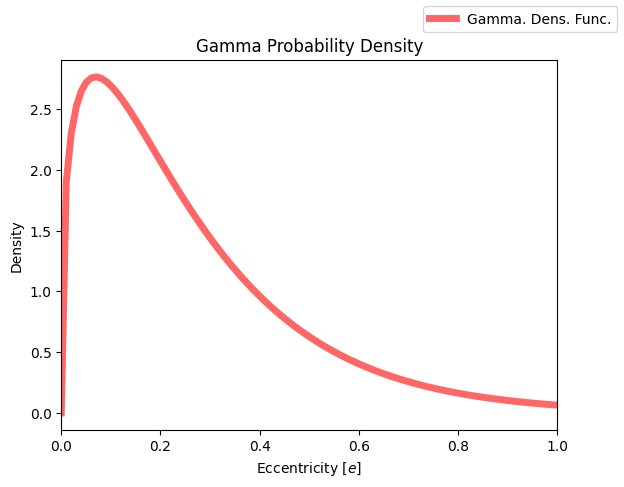

In [52]:
bbox = dict(boxstyle = "round", fc = "orange", ec = "grey", alpha = 0.5)

fig, axs = plt.subplots()

axs.plot(x, pdf, "r-", lw=5, alpha = 0.6, label = "Gamma. Dens. Func.")
# axs.plot(x, y, "b-", lw=5, alpha = 0.6, label = "Uniform Dist. Func.")
plt.xlim(0,1)
# axs.text(0.15, 0.5, stats, fontsize = 9, bbox = bbox)
axs.set_xlabel("Eccentricity [$e$]")
axs.set_ylabel("Density")

fig.legend()
plt.title("Gamma Probability Density")
plt.show()

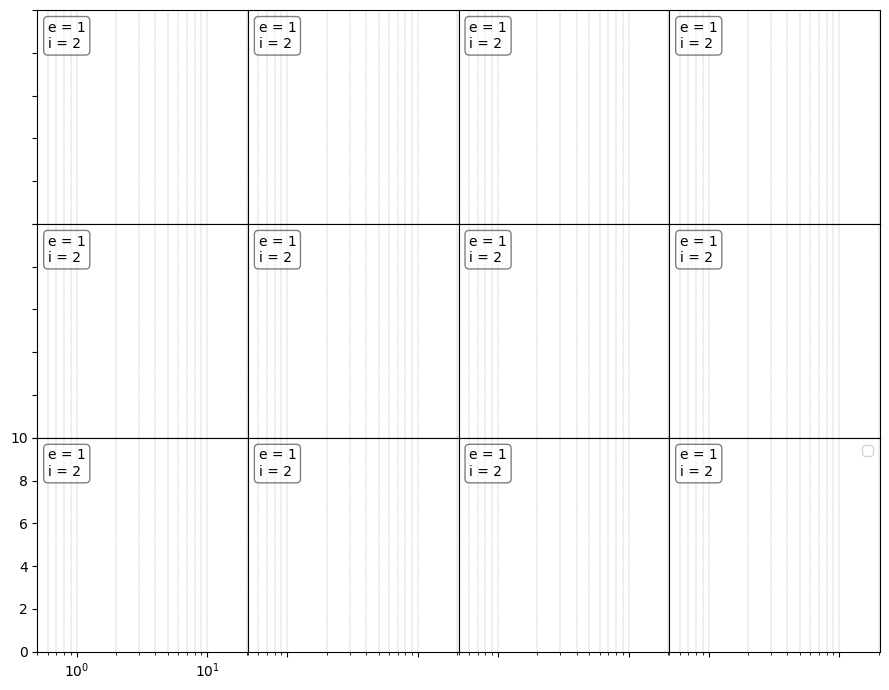

In [2]:
textstr = "\n".join((f'e = {1}', f'i = {2}'))
rect = dict(boxstyle = "round", alpha = 0.5, facecolor = "white")

fig, axs = plt.subplots(3,4, figsize = (9,7), gridspec_kw = {"hspace" : 0, "wspace" : 0}, sharex = False, sharey = False) 
for j, ax  in enumerate(axs.flatten()):
    ax.grid(True,color = "grey", linestyle="--", linewidth="0.25", axis = "x", which = "both")
    ax.set_xlim(0.5,20.5)
    ax.set_ylim(0,10)
    ax.text(0.05, 0.95, textstr, transform = ax.transAxes, fontsize = 10, verticalalignment = "top", bbox = rect)
    # ax.vlines(5-3,0,1, transform = ax.get_xaxis_transform(), colors = "r")
    if j == 0 or j == 4 or j == 8:
        if j == 8:
            ax.tick_params(axis = "both", labelbottom = True, labelleft = True)
        else:
            ax.tick_params(axis = "both", labelbottom = True, labelleft = False)
    else:
        ax.set_yticks([])
        ax.set_xticks([])
        ax.tick_params(axis = "x", labelbottom = False)
    # if j == 11:
    #     handles, labels = ax.get_legend_handles_labels()    
    #     ax.legend(handles,labels,loc = "best")
    
    final_ax = axs.flatten()[-1]
    handles, labels = final_ax.get_legend_handles_labels()
    final_ax.legend(handles, labels, loc = "best")
    ax.set_xscale("log")
    #     if j == 3:
    #         ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    #         ax.yaxis.tick_right()
    # elif j == 7 or j == 11 :
    #     ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    #     ax.yaxis.tick_right()
    #     ax.tick_params(axis = "x", labelbottom = False)
    # else:
    #     ax.set_yticks([])
    #     ax.tick_params(axis = "x", labelbottom = False)        

# fig.suptitle("Test", x = 0.49, y = 0.985)
fig.tight_layout()
# fig.tight_layout(pad=1.25,h_pad=0, w_pad=0, rect = (0.08, 0.0, 0.95, 0.95))
plt.show()

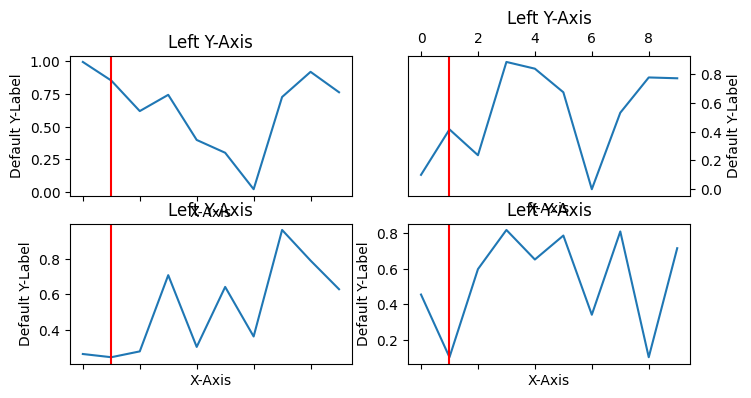

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 1 row and 2 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 4))

# --- Plot on the first axes (ax1) ---
for j, ax in enumerate(axs.flatten()):
    ax.plot(np.random.rand(10))
    ax.set_title('Left Y-Axis')
    ax.set_xlabel('X-Axis')
    ax.set_ylabel('Default Y-Label')
    if j == 1:
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        ax.xaxis.tick_top()
    ax.tick_params(axis = "x", labelbottom = False)
    
# # --- Plot on the second axes (ax2) ---
# ax.plot(np.random.rand(10), color='green')
# ax.set_title('Right Y-Axis')
# ax.set_xlabel('X-Axis')
# ax.set_ylabel('Right Y-Label')

# Move the y-axis label and ticks to the right side for the second subplot
# ax2.yaxis.set_label_position("right")
# ax2.yaxis.tick_right()

# Use tight_layout() to automatically adjust subplot parameters
# and give enough padding for the new label position
# plt.tight_layout()

# Display the plot
plt.show()
